<a href="https://colab.research.google.com/github/FGalvao77/-DICAS-Uso-de-ferramentas-para-Data-Science-e-afins/blob/main/%5BDICAS%5D_Explorando_a_biblioteca_PyOD_para_deteccao_de_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[DICAS] - Explorando a biblioteca `PyOD` para detecção de _outliers_**
---

Nesse notebook iremos explorar a biblioteca `PyOD` para detecção de _outliers_ ou anomalias em conjunto de dados.

Utilizando a função **generate_data** iremos gerar dados sintéticos e a função **KNN** (K-nearest neighbors, ou “K-vizinhos mais próximos”) da mesma biblioteca para aplicação de técnicas baseado em proximidade para "rotular" os _outliers_.



**Saiba mais!**
- [Welcome to PyOD documentation!](https://pyod.readthedocs.io/en/latest/)

Para instalar a _library_ utilize o comando abaixo.

`pip install pyod`

In [ ]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importando as bibliotecas
import pandas as pd                       # análise e manipulação de dados
import numpy as np                        # recursos matemáticos
import matplotlib.pyplot as plt           # visualização gráfica
import seaborn as sns                     # visualização gráfica
from pyod.utils.data import generate_data # gerar dados sintéticos

# configurando o ambiente de exibição
%matplotlib inline
sns.set()

In [ ]:
# utilizando a função "generate_data" para gerar os dados de treino e teste de duas dimensões
Xtrain, ytrain = generate_data(n_train=1_000, train_only=True, n_features=2)

# contabilizando a quantidade de observações em cada subconjunto
len(Xtrain), len(ytrain)

(1000, 1000)

In [ ]:
# visualizando as 10 primeiras observações dos dados de treino e teste
print(
    Xtrain[:10], 
    ytrain[:10], 
    sep='\n\n'
)

[[7.9629593  8.00483967]
 [7.93127408 7.84885428]
 [8.11004898 7.88686558]
 [7.98124711 8.11828299]
 [7.97517479 8.08169979]
 [8.10045585 7.94080766]
 [7.90148012 8.1474421 ]
 [8.16046709 7.98760085]
 [7.92417522 7.83925445]
 [8.12701494 7.96151897]]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# realizando redimensionamento dos dados
data_x = Xtrain[:, [0]].reshape(-1,1)
data_y = Xtrain[:, [1]].reshape(-1,1)

In [ ]:
print(f'data_x:\n{data_x[:5]}', 
      f'data_y:\n{data_y[:5]}', 
      sep='\n\n')

data_x:
[[7.9629593 ]
 [7.93127408]
 [8.11004898]
 [7.98124711]
 [7.97517479]]

data_y:
[[8.00483967]
 [7.84885428]
 [7.88686558]
 [8.11828299]
 [8.08169979]]


In [ ]:
# gerando um data frame com os dados do objeto "data_x"
df = pd.DataFrame(data_x, columns=['x'])

# criando a coluna "y" e inserindo os dados do objeto "data_y"
df['y'] = data_y

# criando a coluna "class" e inserindo os dados do objeto "y_train"
df['class'] = ytrain

In [ ]:
# visualizando as 15 primeiras observações
df.head(15)

,x,y,class
0,7.962959,8.004840,0.0
1,7.931274,7.848854,0.0
2,8.110049,7.886866,0.0
3,7.981247,8.118283,0.0
4,7.975175,8.081700,0.0
5,8.100456,7.940808,0.0
6,7.901480,8.147442,0.0
7,8.160467,7.987601,0.0
8,7.924175,7.839254,0.0
9,8.127015,7.961519,0.0


In [ ]:
# contabilizando a distribuição das classes presentes na coluna "class"
df['class'].value_counts(normalize=True) * 100 

0.0    90.0
1.0    10.0
Name: class, dtype: float64

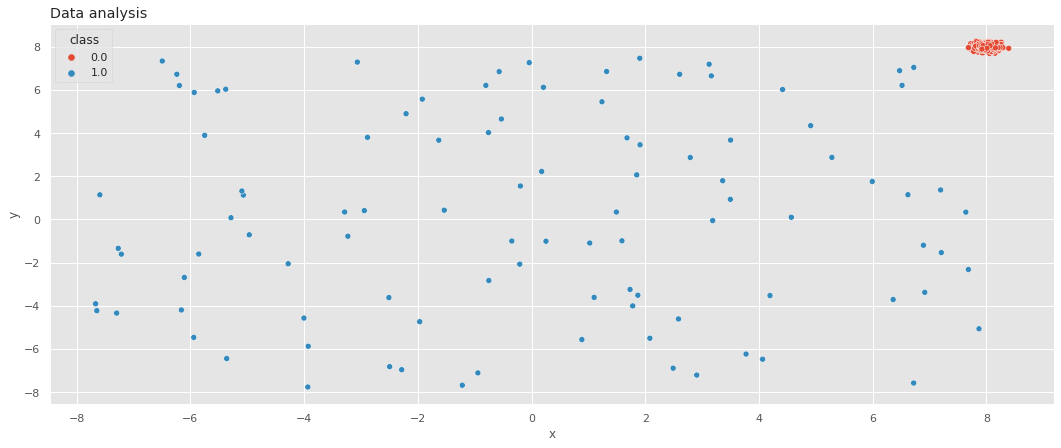

In [ ]:
# visualizando graficamente a dispersão dos dados
plt.style.use('ggplot')
plt.figure(figsize=(18,7))
plt.title('Data analysis', loc='left')
sns.scatterplot(data=df, x='x', y='y', hue='class');

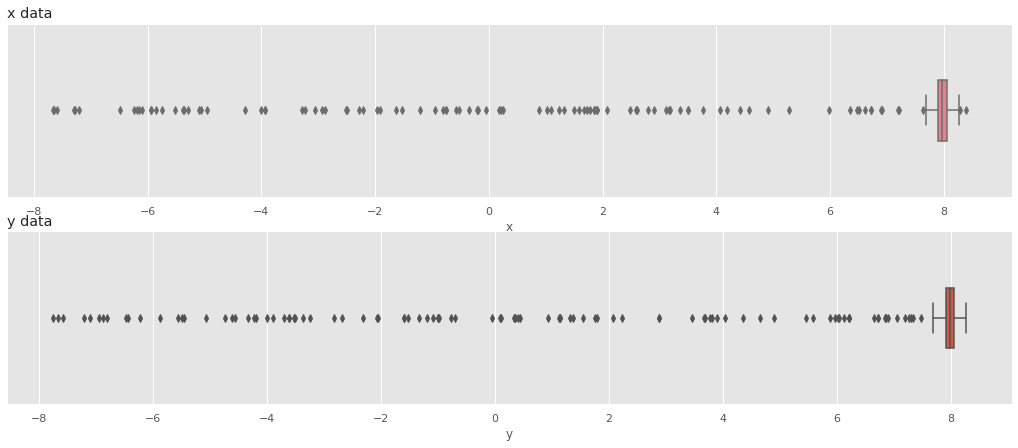

In [ ]:
# plotando o boxplot da distribuição dos dados - x data e y data
plt.figure(figsize=(18,7))

plt.subplot(211)
plt.title('x data', loc='left')
sns.boxplot(data=df, x='x', width=0.35, palette='husl');

plt.subplot(212)
plt.title('y data', loc='left')
sns.boxplot(data=df, x='y', width=0.35);

In [ ]:
# importando a função "KNN"
from pyod.models.knn import KNN

In [ ]:
# instanciando o modelo
mdl_knn = KNN(
    contamination=0.1,
    n_neighbors=5,
    method='largest',
    radius=1.0,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    n_jobs=-1
)

# visualizando o modelo
mdl_knn

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
# treinando o modelo
mdl_knn.fit(df.iloc[:, 0:2])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
# viualizando as predições realizadas pelo modelo
pred = mdl_knn.labels_

print(
    pred[:30],          # as 30 primeiras
    pred[-30:],         # as 30 últimas
    sep='\n\n'
)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# instanciando as predições únicas e salvando no objeto "analysis"
analysis = np.unique(pred, return_counts=True)

# instanciando o "score" do índice de confiança realizado pelo modelo
conf = mdl_knn.decision_scores_

In [ ]:
# inserindo no conjunto de dados as variáveis "predicted" e "confidence"
df['predicted'] = pred      # predições realizadas pelo modelo
df['confidence'] = conf     # índice de confiança das predições

# visualizando as 20 primeiras observações
df.head(20)

,x,y,class,predicted,confidence
0,7.962959,8.004840,0.0,0,0.009798
1,7.931274,7.848854,0.0,0,0.017549
2,8.110049,7.886866,0.0,0,0.010154
3,7.981247,8.118283,0.0,0,0.014843
4,7.975175,8.081700,0.0,0,0.010317
5,8.100456,7.940808,0.0,0,0.014825
6,7.901480,8.147442,0.0,0,0.017175
7,8.160467,7.987601,0.0,0,0.011460
8,7.924175,7.839254,0.0,0,0.017355
9,8.127015,7.961519,0.0,0,0.011720


In [ ]:
# visualizando o "report"
print(
    f'Report: {analysis}'
)

Report: (array([0, 1]), array([900, 100]))


In [ ]:
# visualizando a distribuição dos dados es suas respectivas classes
print(
    (df['class'] == 1.0).value_counts(), 
    (df['predicted'] == 1.0).value_counts(),
    sep='\n\n'
)

False    900
True     100
Name: class, dtype: int64

False    900
True     100
Name: predicted, dtype: int64


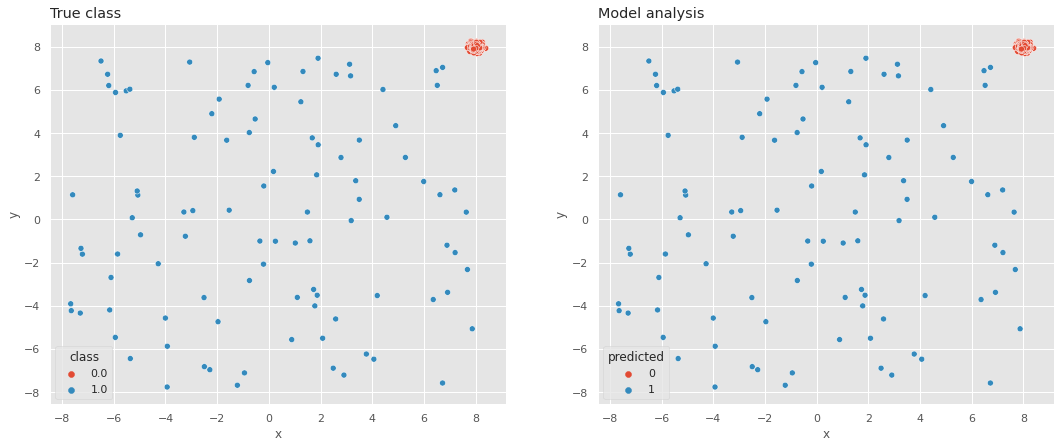

In [ ]:
# plotando gráfico de dispersão dos dados reais e da classificação de outliers realizado pelo modelo
plt.style.use('ggplot')
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.title('True class', loc='left')
sns.scatterplot(data=df, x='x', y='y', hue='class');

plt.subplot(1,2,2)
plt.title('Model analysis', loc='left')
sns.scatterplot(data=df, x='x', y='y', hue='predicted');